In [1]:
import numpy
xdata=numpy.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
ydata=numpy.array([[0],[1],[1],[0]])
numpy.random.seed(1) #for getting uniformly distributed values
w0=numpy.random.random((3,3))
w1=numpy.random.random((3,1))

In [2]:
for i in range(5000):
   #feedforward part of the algorithm
   l0=xdata;
   l1=1/(1+numpy.exp(-(numpy.dot(l0,w0))))
   l2=1/(1+numpy.exp(-(numpy.dot(l1,w1))))
   e=l2-ydata #here we are done with forward propagation part#here starts the backpropagation part
   delta2=e*(l2*(1-l2)) #backpropagating this delta to l1 layer
   delta1=delta2.dot(w1.T)*l1*(1-l1)
   dedw2=l1.T.dot(delta2)
   dedw1=l0.T.dot(delta1)
   w1=w1-0.8*dedw2
   w0=w0-0.8*dedw1
   if (i%100)==0:
      print("Error= "+str(numpy.mean(numpy.abs(e))))
print(l2)

Error= 0.4994609146843254
Error= 0.5000194596382245
Error= 0.49997400704103223
Error= 0.49990749848014465
Error= 0.49976960366941237
Error= 0.4993940591333557
Error= 0.49788657926930946
Error= 0.4884202618489034
Error= 0.4340412463415098
Error= 0.3384846122748836
Error= 0.22297510477910137
Error= 0.1545930500372575
Error= 0.12021738166542945
Error= 0.10015329383956847
Error= 0.08697235620381609
Error= 0.07758861141323925
Error= 0.07052214387398592
Error= 0.06497825660757804
Error= 0.06049198427837266
Error= 0.05677268802874347
Error= 0.05362897144589951
Error= 0.05092938206560456
Error= 0.048580465189815576
Error= 0.04651383619687424
Error= 0.044678217913698755
Error= 0.043034347234505554
Error= 0.041551609770112026
Error= 0.040205752933401596
Error= 0.038977293235143665
Error= 0.03785038277621657
Error= 0.03681198687926263
Error= 0.03585127710780384
Error= 0.03495917628065526
Error= 0.03412801262073831
Error= 0.033351253502911744
Error= 0.032623298093763714
Error= 0.0319393141355195
E

In [3]:
from sklearn import datasets
from sklearn import model_selection
from sklearn import neural_network
import matplotlib.pyplot as plt


In [5]:
digits=datasets.load_digits()
x=digits.data
y=digits.target
im=digits.images

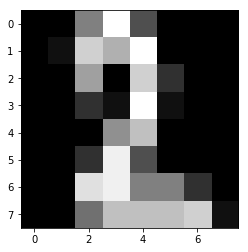

In [15]:
plt.imshow(im[22],cmap='gray',interpolation='nearest') 
plt.show()

In [16]:
#breaking the dataset into train and test
xtrain,xtest,ytrain,ytest,imtrain,imtest=model_selection.train_test_split(x,y,im,test_size=0.2,random_state=5)
print(xtrain.shape)
print(xtest.shape)

(1437, 64)
(360, 64)


In [18]:
nn=neural_network.MLPClassifier(hidden_layer_sizes=(20,20,20),solver='sgd')
nn.fit(xtrain,ytrain)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

accuracy is  
0.9611111111111111
the actual value is 0
prediction is [0]


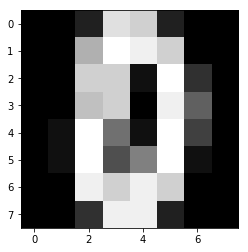

In [23]:
print('accuracy is  ')
print(nn.score(xtest,ytest))
print('the actual value is '+str(ytest[22]))#right value
print('prediction is ' + str(nn.predict(xtest[22].reshape(1,-1)))) #predicted value
plt.imshow(imtest[22],cmap='gray') #main image
plt.show()